***"Pollution Pulse: Mapping India’s Air Quality Snapshot"***


In [26]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df= pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\AIR_QUALITY\dataset\air_quality.csv")
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Kanuru, Vijayawada - APPCB",04-04-2025 14:00:00,16.486692,80.699436,OZONE,20.0,32.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,SO2,10.0,13.0,11.0
2,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,CO,30.0,41.0,32.0
3,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",04-04-2025 14:00:00,16.554731,80.649110,NO2,14.0,18.0,15.0
4,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",04-04-2025 14:00:00,17.720000,83.300000,NO2,28.0,68.0,43.0


In [4]:
#basic inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3229 non-null   object 
 1   state          3229 non-null   object 
 2   city           3229 non-null   object 
 3   station        3229 non-null   object 
 4   last_update    3229 non-null   object 
 5   latitude       3229 non-null   float64
 6   longitude      3229 non-null   float64
 7   pollutant_id   3229 non-null   object 
 8   pollutant_min  3026 non-null   float64
 9   pollutant_max  3026 non-null   float64
 10  pollutant_avg  3026 non-null   float64
dtypes: float64(5), object(6)
memory usage: 277.6+ KB


In [5]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3229.000000,3229.000000,3026.000000,3026.000000,3026.00000
mean,22.154725,78.746203,22.024124,84.134171,47.08427
std,5.595920,4.945867,24.072022,93.823734,50.30609
min,8.514909,70.909168,1.000000,1.000000,1.00000
25%,18.910000,75.565602,5.000000,19.000000,12.00000
50%,23.016834,77.494094,14.000000,54.500000,31.00000
75%,26.786682,80.699436,31.000000,108.000000,62.00000
max,34.066206,94.636574,326.000000,500.000000,396.00000


In [6]:
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    203
pollutant_max    203
pollutant_avg    203
dtype: int64

In [7]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [8]:
# Replace 'NA' with NaN and convert to numeric
df[['pollutant_min', 'pollutant_max', 'pollutant_avg']] = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].replace('NA', pd.NA)
for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#drop rows with all  three pollutant values as NaN
df = df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'], how='all')

In [10]:
#Check duplicates
duplicates= df.duplicated(subset=['station','pollutant_id','last_update'])
print(f"Number of duplicates: {duplicates.sum()}")


Number of duplicates: 0


In [ ]:
#Outlier check
pm25_avrage =df[df['pollutant_id']=='PM2.5']['pollutant_avg']
mean, std = pm25_avrage.mean() , pm25_avrage.std()
outliers= pm25_avrage[(pm25_avrage > mean + 3*std) | (pm25_avrage <mean - 3*std)]
print(f"Potential PM2.5 outliers: {outliers}")

Potential PM2.5 outliers: 6       316.0
533     351.0
1193    396.0
1418    299.0
1642    326.0
Name: pollutant_avg, dtype: float64


In [ ]:
#geospatial validation
validlatitute =df['latitude'].between(8,37)  #India's latitude range
validlong= df['longitude'].between(68,97) # India's longitude range
print(f"Invalid coordinates: {((~validlatitute) | (~validlong)).sum()}")

Invalid coordinates: 0


In [17]:
#save the cleaned data to a new csv file
df.to_csv('../dataset/air_quality_cleaned.csv', index=False)
print("Cleaned data is  saved!")

Cleaned data is  saved!


***EDA and Basic Visualizations***

In [19]:
df = pd.read_csv('../dataset/air_quality_cleaned.csv')
print("Data loaded successfully!")
df.head()

Data loaded successfully!


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Kanuru, Vijayawada - APPCB",04-04-2025 14:00:00,16.486692,80.699436,OZONE,20.0,32.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,SO2,10.0,13.0,11.0
2,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,CO,30.0,41.0,32.0
3,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",04-04-2025 14:00:00,16.554731,80.649110,NO2,14.0,18.0,15.0
4,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",04-04-2025 14:00:00,17.720000,83.300000,NO2,28.0,68.0,43.0


In [24]:
#Summarize  pollutant distribution
pollutant_summary = df.groupby('pollutant_id')[['pollutant_avg']].agg(['mean', 'min','max','count'])
print("Pollutant summary stats\n")
pollutant_summary


Pollutant summary stats



pollutant_avg                  
                      mean  min    max count
pollutant_id                                
CO               36.848812  2.0  129.0   463
NH3               5.673469  1.0   23.0   392
NO2              32.687927  1.0  179.0   439
OZONE            47.623608  1.0  304.0   449
PM10            101.459207  2.0  360.0   429
PM2.5            83.877315  6.0  396.0   432
SO2              18.241706  1.0  107.0   422

In [25]:
#Top and bottom PM2.5 cities
pm25_avg = df[df['pollutant_id'] == 'PM2.5'].groupby('city')['pollutant_avg'].mean().sort_values()
print("Lowest PM2.5 Cities:\n", pm25_avg.head(5))
print("Highest PM2.5 Cities:\n", pm25_avg.tail(5))

Lowest PM2.5 Cities:
 city
Gadag             8.0
Tirupur          13.0
Palkalaiperur    14.0
Madikeri         15.0
Agartala         16.0
Name: pollutant_avg, dtype: float64
Highest PM2.5 Cities:
 city
Hajipur          192.0
Greater Noida    201.0
Ghaziabad        241.5
Siliguri         256.0
Byrnihat         316.0
Name: pollutant_avg, dtype: float64


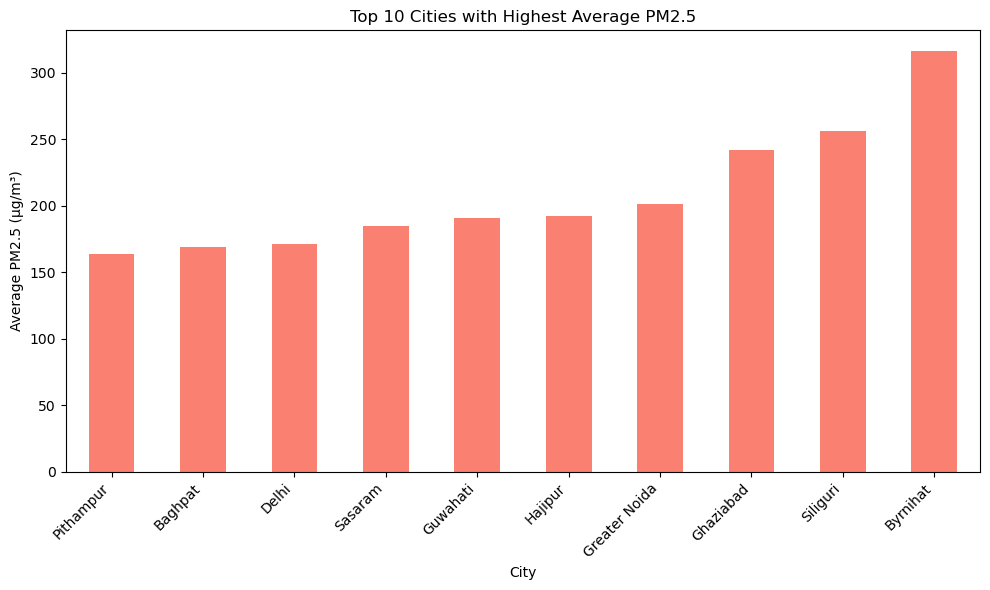

In [27]:
#Plot 1: Top 10 PM2.5 cities
plt.figure(figsize=(10,6))
pm25_avg.tail(10).plot(kind='bar',color='salmon')
plt.title('Top 10 Cities with Highest Average PM2.5')
plt.xlabel('City')
plt.ylabel('Average PM2.5 (μg/m³)')
plt.xticks(rotation=45 , ha='right')
plt.tight_layout()
plt.savefig('../outputs/pm25_top10.png')
plt.show()


In [30]:
#North vs. South comparison
north_states = ['Delhi', 'Uttar_Pradesh', 'Bihar', 'Haryana']
south_states = ['Karnataka', 'TamilNadu', 'Kerala', 'Andhra_Pradesh']
df['region']= df['state'].apply(lambda x: 'North' if x in north_states else ('South' if x in south_states else 'Other'))
pm25_region = df[df['pollutant_id']== 'PM2.5'].groupby('region')['pollutant_avg'].mean()
print("PM2.5 by Region:\n", pm25_region)

PM2.5 by Region:
 region
North    124.594828
Other     78.089431
South     36.742857
Name: pollutant_avg, dtype: float64


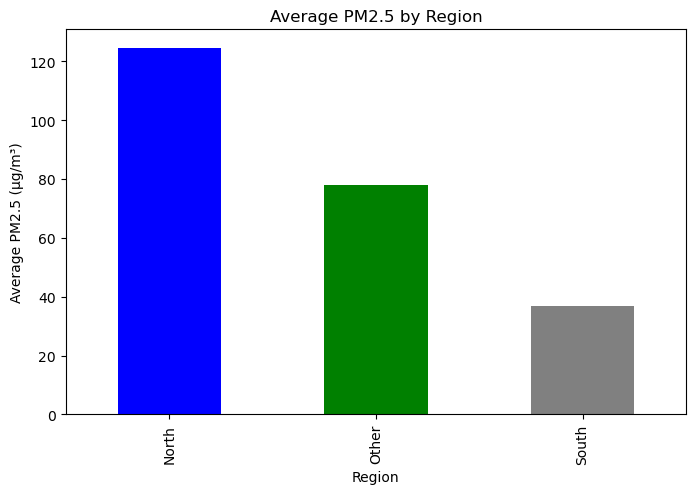

In [ ]:
#Plot 2: Regional PM2.5 Comparison
plt.figure(figsize=(8,5))
pm25_region.plot(kind='bar', color=['blue','green', 'gray'])
plt.title('Average PM2.5 by Region')
plt.xlabel('Region')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../outputs/pm25_region.png')
plt.show()


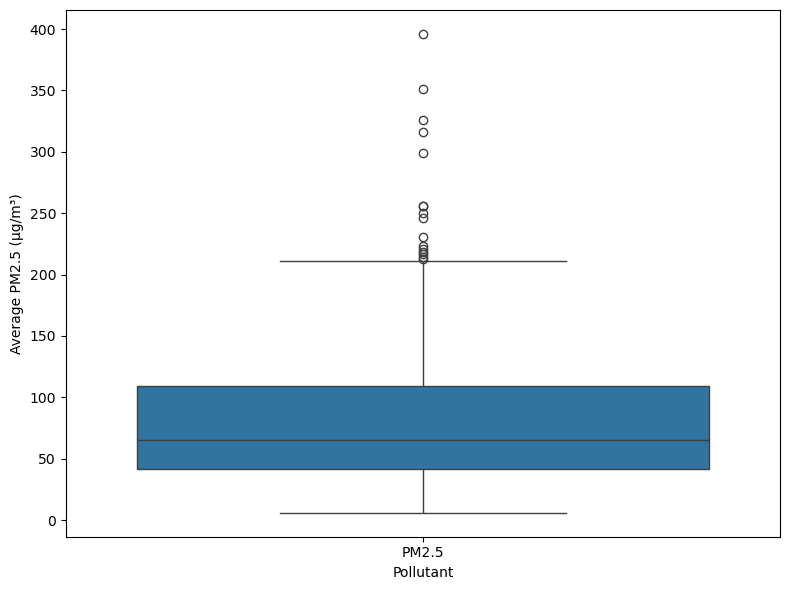

In [37]:
#PM2.5 variability across stations
plt.figure(figsize=(8,6))
sns.boxplot(x='pollutant_id', y='pollutant_avg',data= df[df['pollutant_id']=='PM2.5'])
plt.xlabel('Pollutant')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.tight_layout()
plt.savefig('../outputs/pm25_boxplot.png')
plt.show()